# Hola Marco!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
Hola Marco! Te felicito realizaste un proyecto de muy buena calidad y muy apropiado. Espero continues aprendiendo y fortaleciendo tus conocimientos. Hasta pronto!
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la introducción del proyecto.
</div>

## Preparación

In [2]:
#Importar librerias
import time
from catboost import Pool, CatBoostRegressor
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose



In [3]:
#importar datos
df = pd.read_csv('/datasets/taxi.csv')
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Cargaste el dataframe exitosamente.
</div>

In [4]:
df.shape

(26496, 2)

In [5]:
#informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Se puede observar que no existen valores nulos, pero el formato del campo datetime deberia ser datatime por lo que lo transformaremos mas adelante

In [6]:
#Cambio de formato a datatime

df['datetime'] = pd.to_datetime(df['datetime'], format='%Y/%m/%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [7]:
#informacion descriptiva del dataset
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la exploración Inicial de los datos</div>


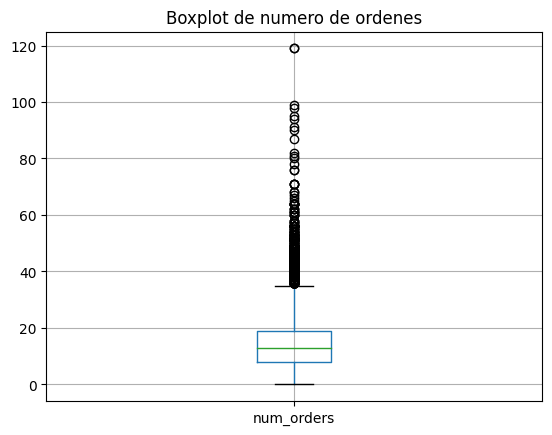

In [8]:
#revision de outliers del campo num_orders
df[['num_orders']].boxplot()
plt.title(f'Boxplot de numero de ordenes')
plt.show()

In [9]:
#revision de outliers del campo registrationyear
df['num_orders'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  60,  61,  62,  64,  65,  66,
        67,  68,  71,  76,  78,  80,  81,  82,  87,  90,  91,  94,  95,
        98,  99, 119])

In [10]:
#Revision periodo de muestra

df.sort_values(by = 'datetime')

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
...,...,...
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39


No se observan valores atipicos que deban corregirse o eliminarse, por lo que nuestro dataset se encuentra listo para el analisis

Tenemos una muestra recopilada de 6 meses segun lo verificado con el sort_values

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien, interesante trabajo con el dataframe.
</div>


## Análisis

Para arrancar con el analisis se debe remuestrar a 1 hora que es lo que solicita el proyecto actual

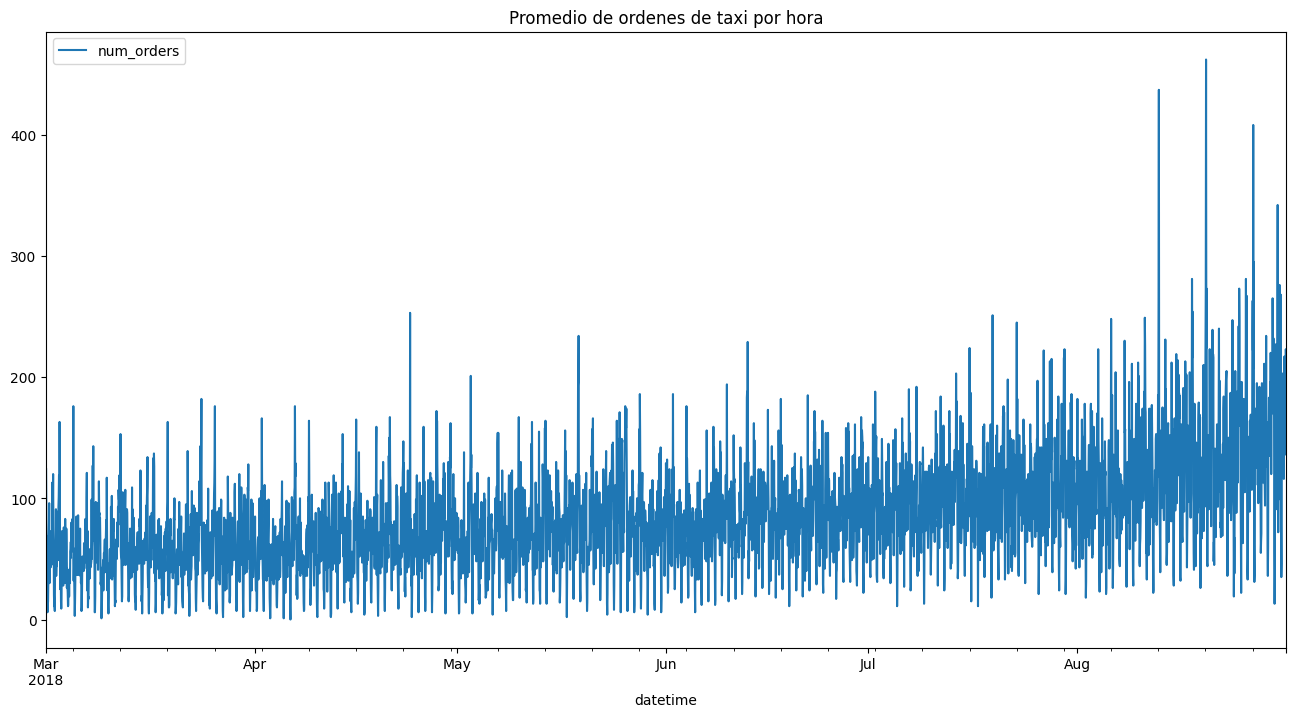

In [11]:
#Remuestreo a 1 hora

df.set_index('datetime', inplace=True)
data = df.resample('1H').sum()
data.plot(figsize=(16,8))
plt.title('Promedio de ordenes de taxi por hora')
plt.show()

Para verificar mas de cerca los datos remuestrados, haremos uso de la tendencia y estacionalidad de los mismos

In [12]:
#genera la funcion para analizar la estacionalidad

def seasonal_analisis(data):
    decomposed = seasonal_decompose(data)

    plt.figure(figsize=(16, 20))

    plt.subplot(311)
    decomposed.trend.plot(ax=plt.gca())
    plt.title('Tendencia')
    plt.subplot(312)
    decomposed.seasonal.plot(ax=plt.gca())
    plt.title('Estacionalidad')
    plt.subplot(313)
    decomposed.resid.plot(ax=plt.gca())
    plt.title('Residuo')
    plt.tight_layout()
    plt.show()

In [13]:
#funcion para calculo de la media movil

def rolling_graf(data,rolling_number):
    x = data
    x['rolling'] = x.rolling(rolling_number).mean()
    x.plot(figsize=(16, 8))
    plt.title('Media movil, taxis por hora')
    plt.show()

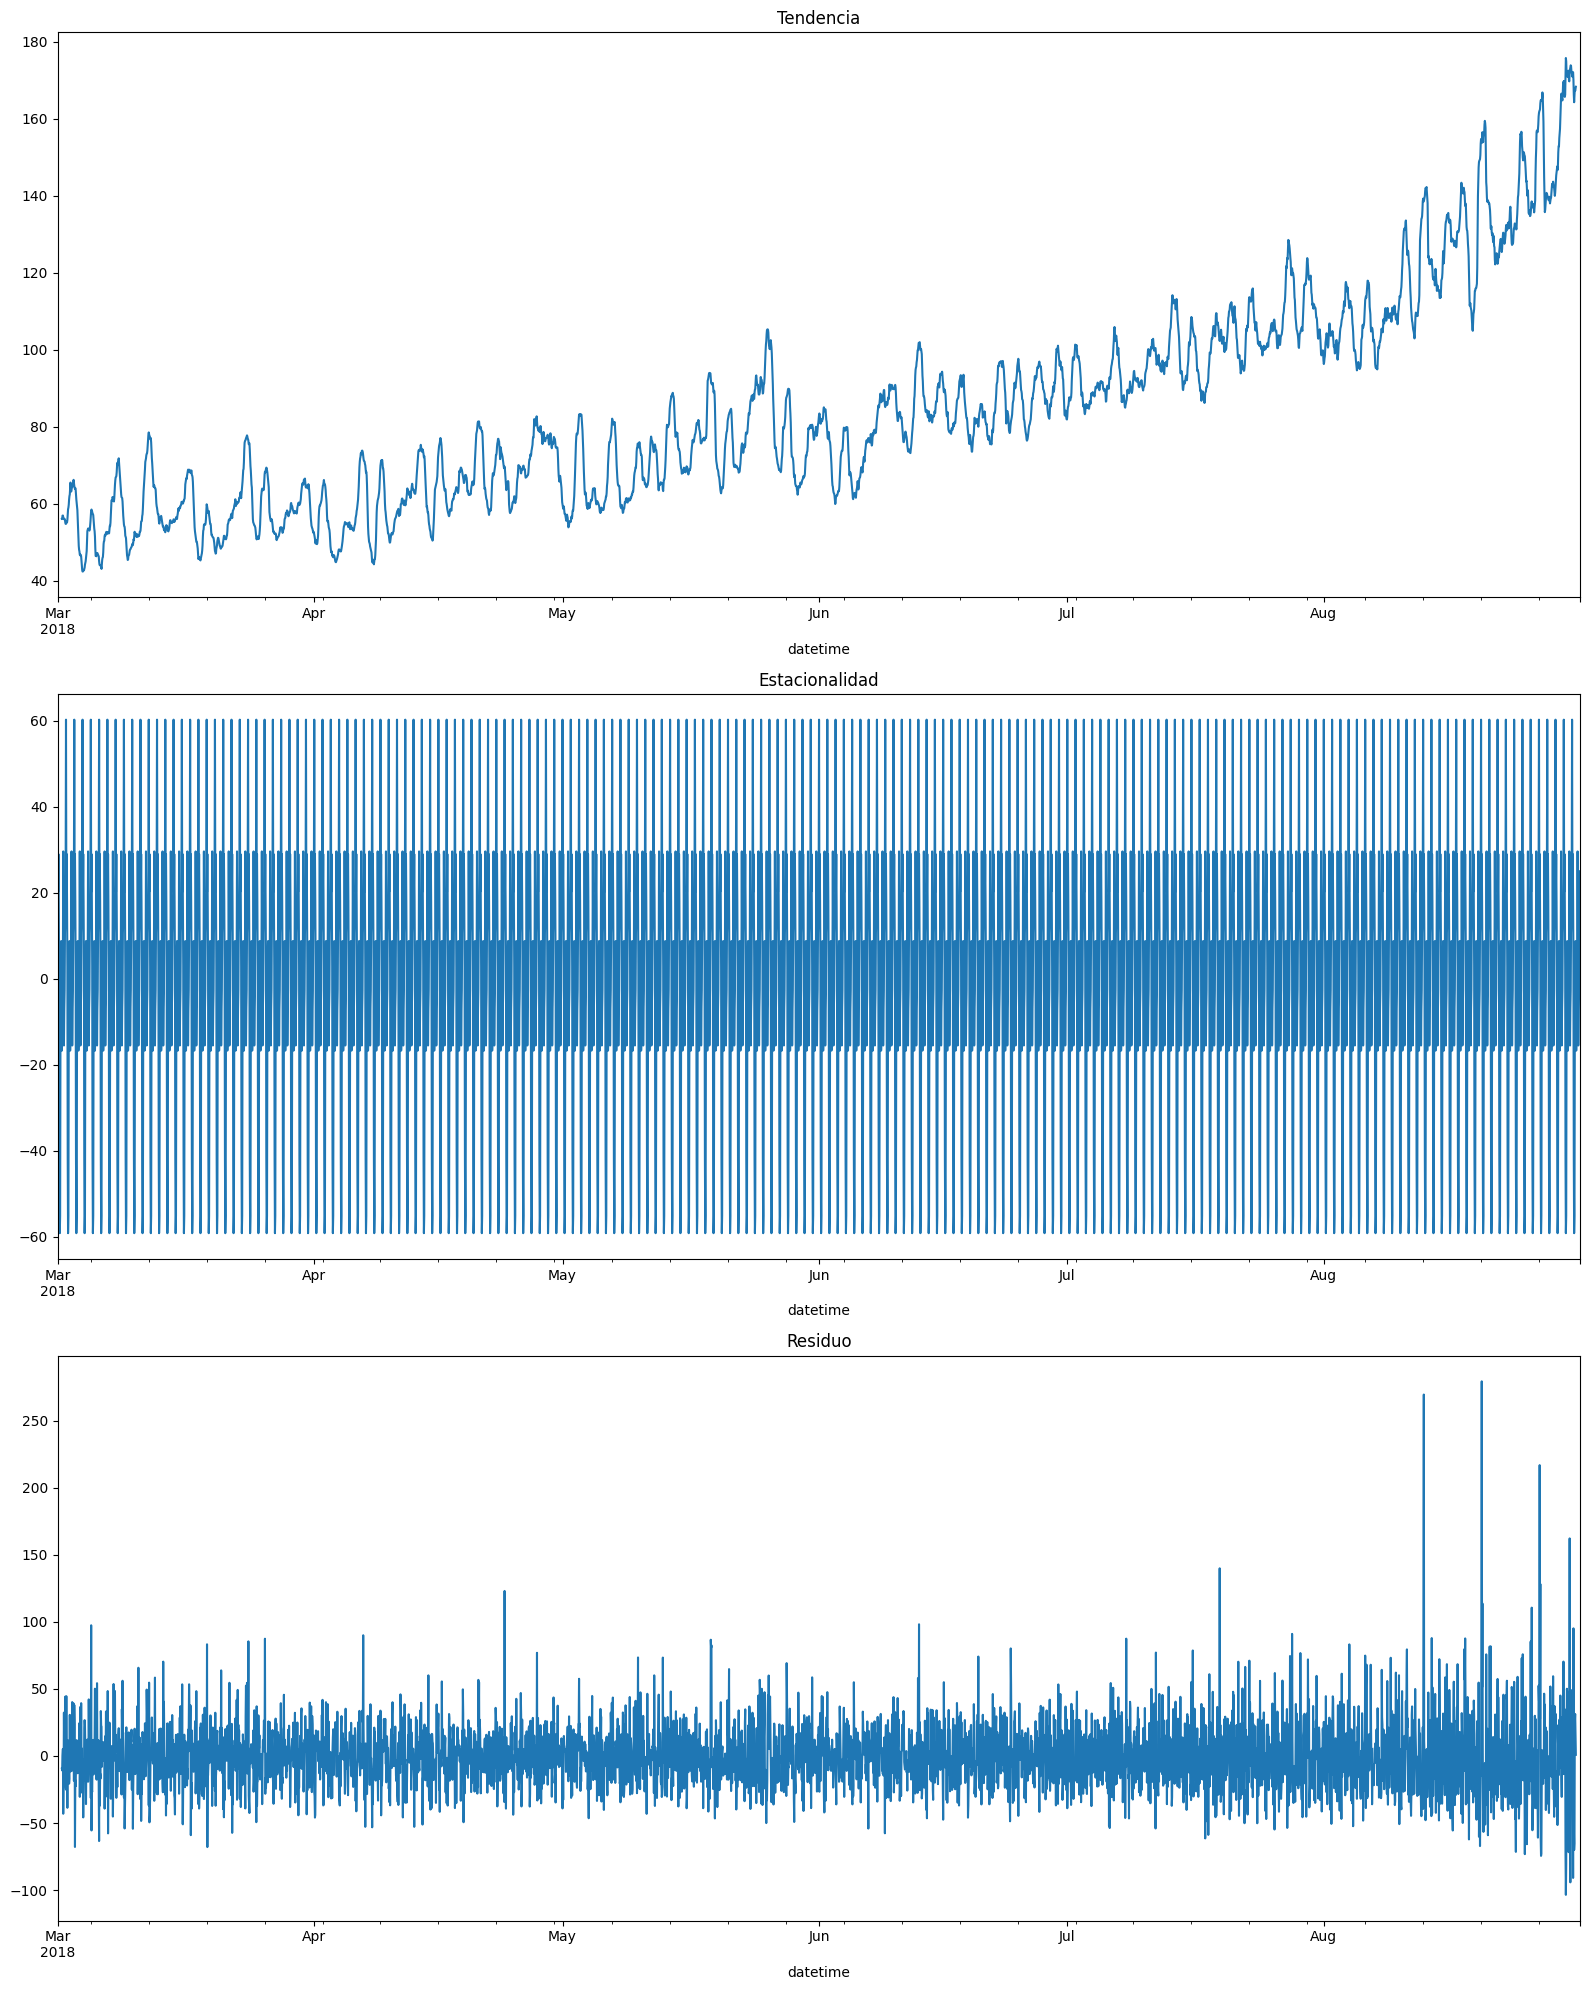

In [14]:
#Analisis de estacionalidad del dataset remuestreado

seasonal_analisis(data)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con los gráficos propios de las series de tiempo, sin embargo podrías profundizar un poco más sobre los comentarios de los mismos.
</div>


Se puede observar que existe una tendencia creciente con el tiempo y que tiene una estacionalidad periodica 

Verificaremos el periodo de un mes para ver mas de cerca como se comporta la tendencia y la estacionalidad

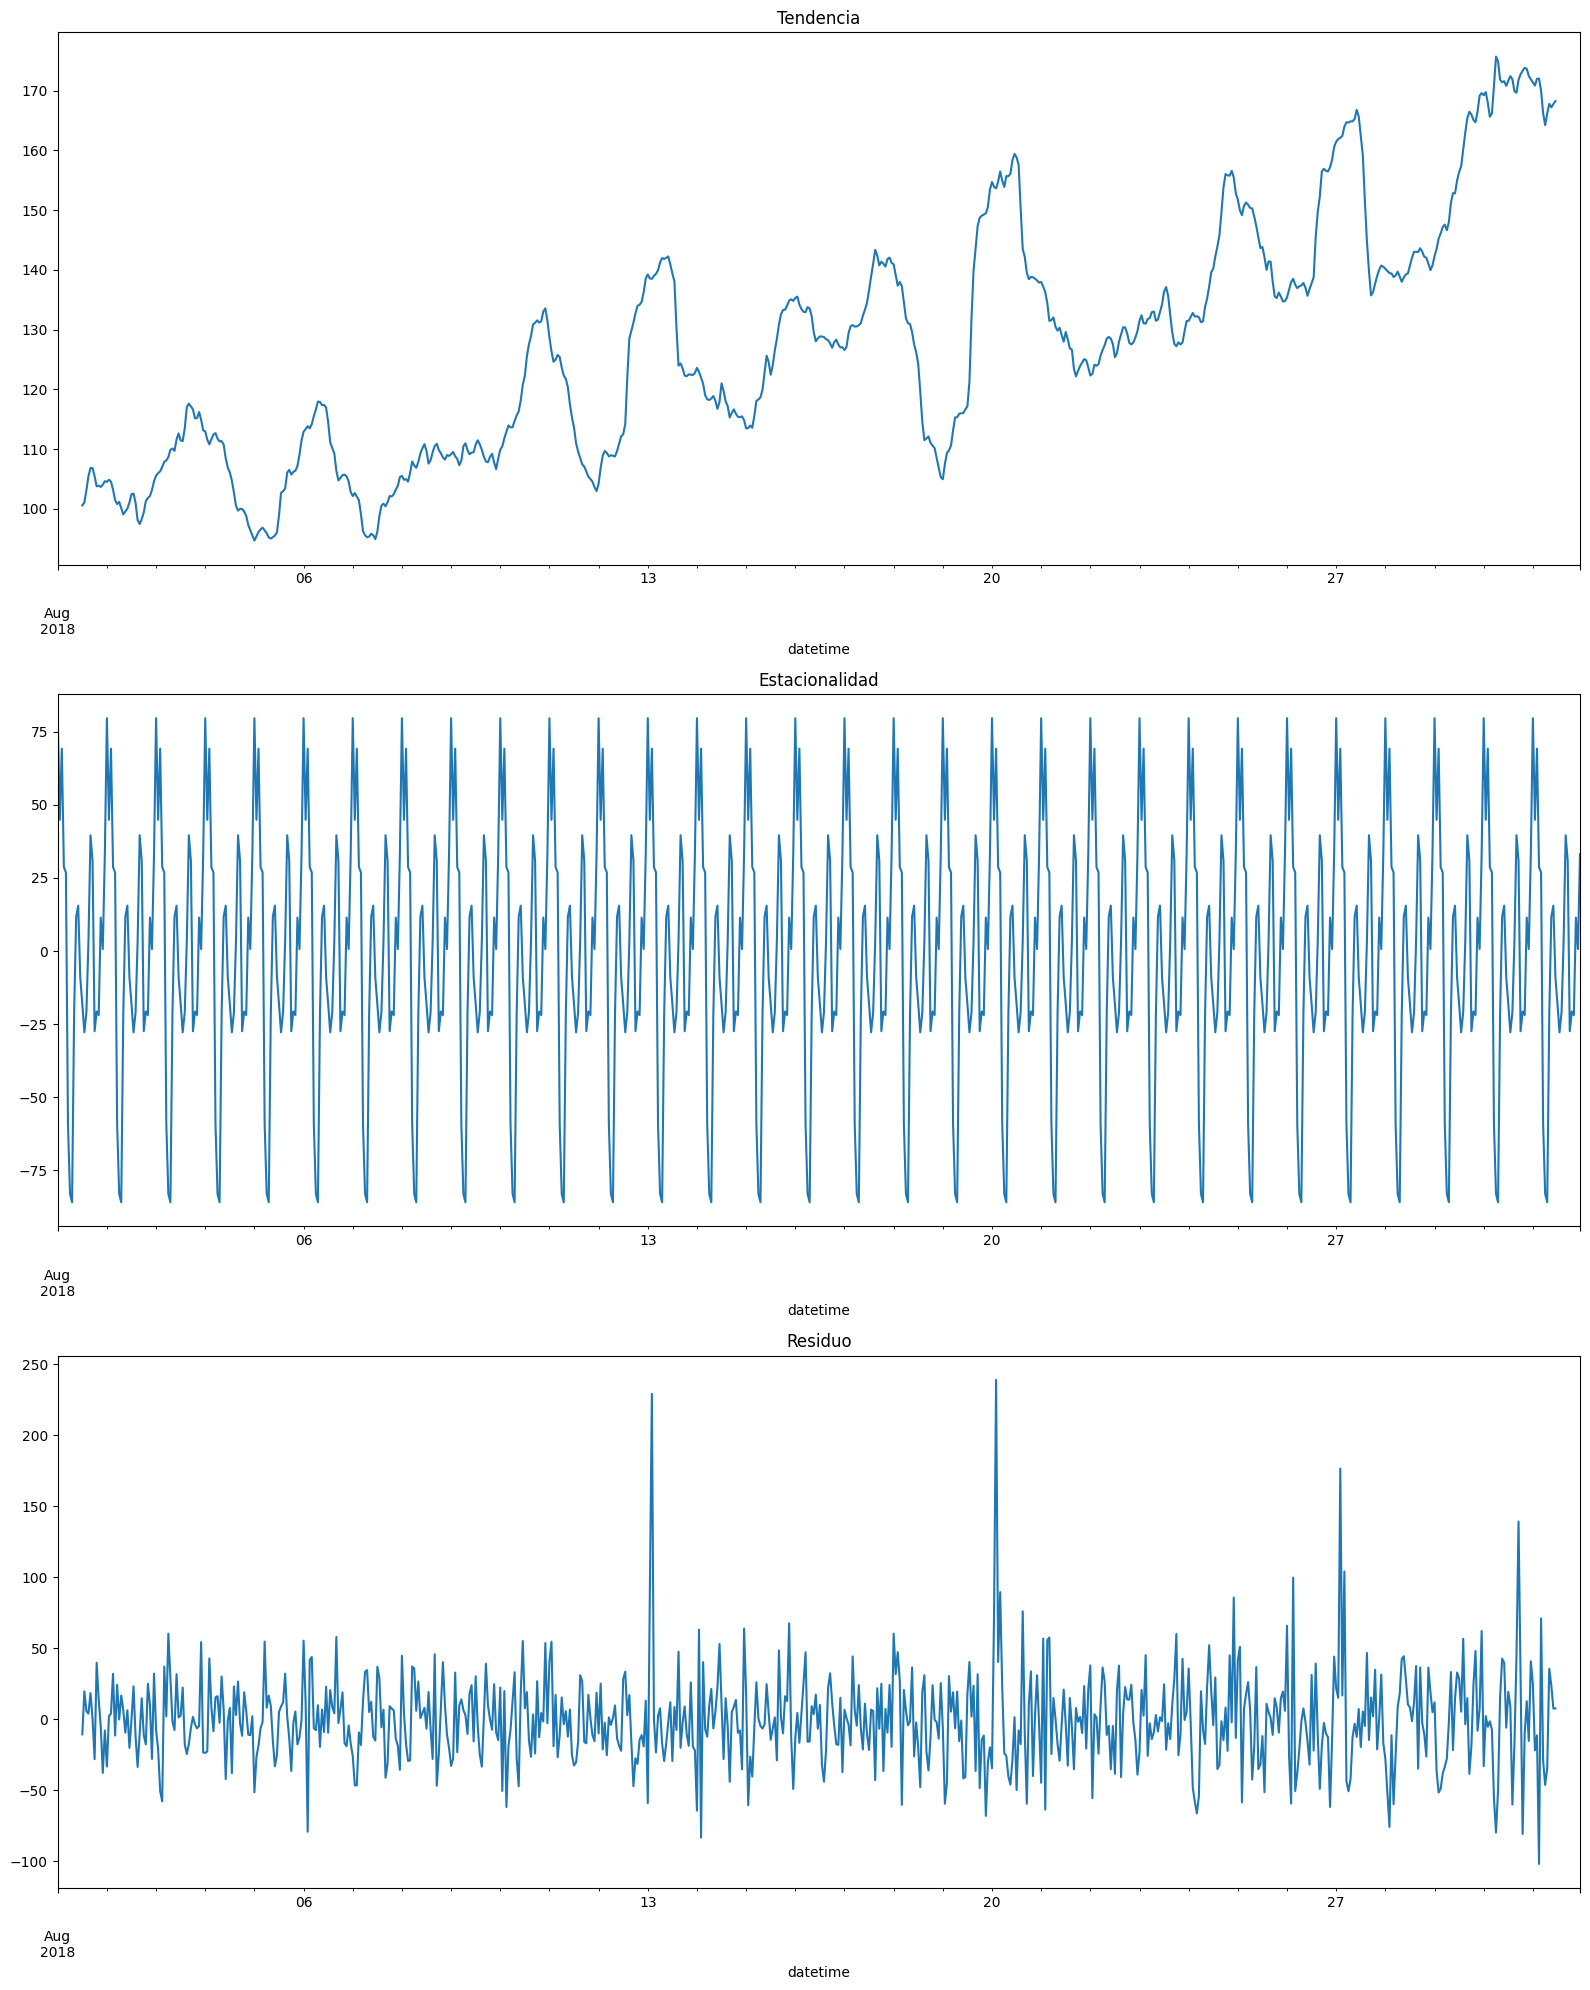

In [15]:
#Verificacion de tendencia y estacionalidad mes de agosto

seasonal_analisis(data['2018-08-01':'2018-08-31'])

/tmp/ipykernel_31/4068475108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['rolling'] = x.rolling(rolling_number).mean()


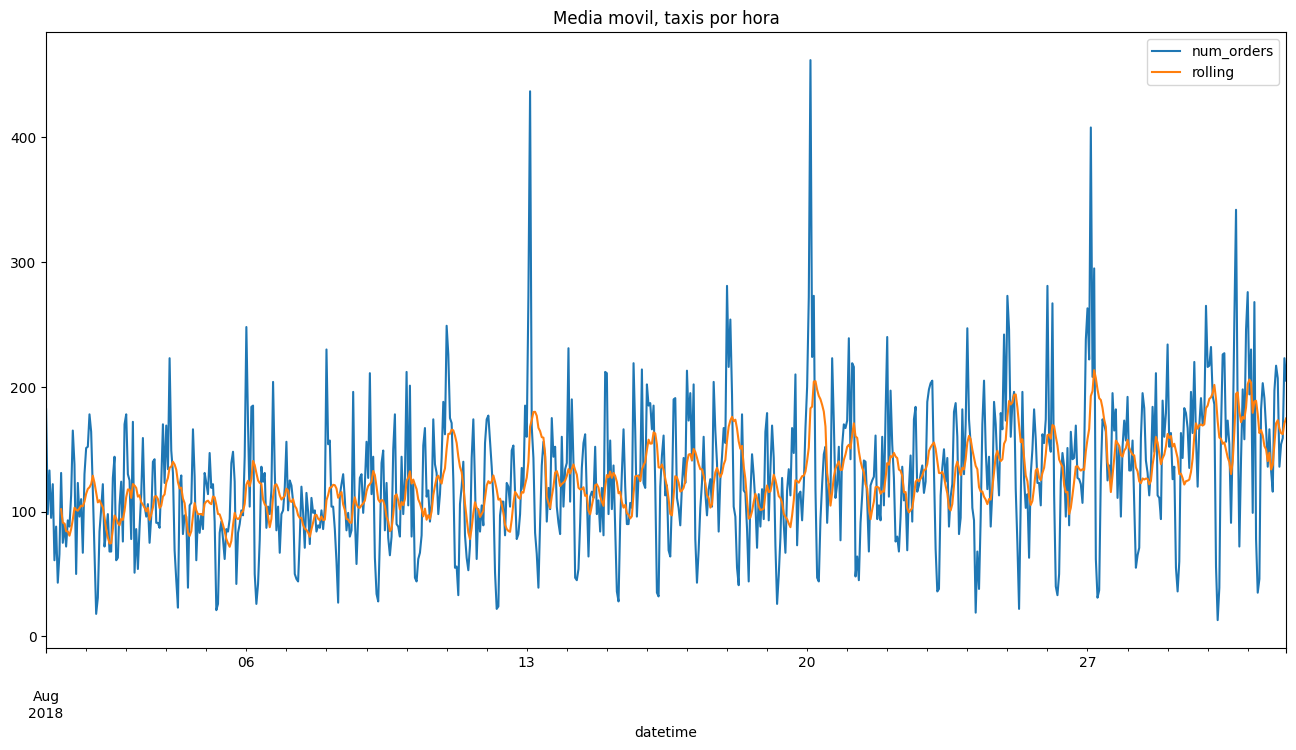

In [16]:
#Verificacion de la media movil

rolling_graf(data['2018-08-01':'2018-08-31'],10)

Podemos observar que al menos en el mes de agosto, la tendencia es creciente es bastante notoria y que la estacionalidad es de un poco menos de 24 horas 

La media movil, tambien se alinea a una tendencia creciente solo que suavizada

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Genial, trabajaste adecuadamente con la  construcción de la medio móvil y su visualización.
</div>


## Formación

Se preparan las funciones que nos ayudaran a entrenar los modelos de prediccion que elijamos

In [17]:
#Genera los datos de entrenamiento y prueba

train, test = train_test_split(data,shuffle=False,test_size=0.1)
features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

In [18]:
# Comprobaremos los valores de RECM sin utilizar ningun modelo aun
def no_train_test(data,target):
    
    #target: columna de datos objetivo
    
    print('Numero promedio de ordenes de taxi por hora:', round(test[target].mean(),0))
    print()
    pred_mean = pd.Series(train[target].mean(),index = test.index)
    print('RECM con valores constantes')
    print('RECM =', round(mean_squared_error(test,pred_mean,squared=False),0))
    pred_previous = test.shift()
    pred_previous.iloc[0] = train.iloc[-1]
    print()
    print('RECM con valor anterior a la serie')
    print('RECM:', round(mean_squared_error(test[target], pred_previous,squared=False),0))

In [19]:
no_train_test(data,'num_orders')

Numero promedio de ordenes de taxi por hora: 140.0

RECM con valores constantes
RECM = 85.0

RECM con valor anterior a la serie
RECM: 59.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Interesante el desarrollo de esa prueba de cordura para poder tener una métrica de referencia.

</div>

De los resultados obtenidos, el mejor RECM obtenido es de 59, bastante bueno tomando en cuenta que no hemos usando aun ningun modelo, pero aun lejos de nuestro objetivo de 48, por lo que haremos uso de neustros modelos para mejorar esta metrica

In [20]:
#crea las caracteristicas de calendario, desfase y media movil

def features(data, max_lag, rolling_mean_size,target):

    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[target].shift(lag)

    data['rolling_mean'] = data[target].shift().rolling(rolling_mean_size).mean()

In [21]:
# Crea las caracteristicas usando la funciona definida
features(data, 4, 4, 'num_orders')

data

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean
datetime,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,0,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,1,124.0,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,2,85.0,124.0,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,3,71.0,85.0,124.0,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,4,66.0,71.0,85.0,124.0,86.50
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,2018,8,31,4,19,207.0,217.0,197.0,116.0,184.25
2018-08-31 20:00:00,154,2018,8,31,4,20,136.0,207.0,217.0,197.0,189.25
2018-08-31 21:00:00,159,2018,8,31,4,21,154.0,136.0,207.0,217.0,178.50


In [22]:
#eliminamos los valores ausentes que se generan al crear las caracteristicas

data.dropna(inplace=True)

data

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean
datetime,,,,,,,,,,,
2018-03-01 04:00:00,43,2018,3,1,3,4,66.0,71.0,85.0,124.0,86.50
2018-03-01 05:00:00,6,2018,3,1,3,5,43.0,66.0,71.0,85.0,66.25
2018-03-01 06:00:00,12,2018,3,1,3,6,6.0,43.0,66.0,71.0,46.50
2018-03-01 07:00:00,15,2018,3,1,3,7,12.0,6.0,43.0,66.0,31.75
2018-03-01 08:00:00,34,2018,3,1,3,8,15.0,12.0,6.0,43.0,19.00
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,2018,8,31,4,19,207.0,217.0,197.0,116.0,184.25
2018-08-31 20:00:00,154,2018,8,31,4,20,136.0,207.0,217.0,197.0,189.25
2018-08-31 21:00:00,159,2018,8,31,4,21,154.0,136.0,207.0,217.0,178.50


In [23]:
#Define funcion para escalamiento de datos

def maxscaler(data,columns):
    
    scaler = MaxAbsScaler()
    scaler.fit(data[columns])
    data[columns] = scaler.transform(data[columns])
    return data[columns]

In [24]:
#escalamos los datos a usar

maxscaler(data,['year', 'month', 'day', 'dayofweek','hour', 'lag_1', 'lag_2',
       'lag_3', 'lag_4', 'rolling_mean'])

data

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean
datetime,,,,,,,,,,,
2018-03-01 04:00:00,43,1.0,0.375,0.032258,0.500000,0.173913,0.142857,0.153680,0.183983,0.268398,0.281072
2018-03-01 05:00:00,6,1.0,0.375,0.032258,0.500000,0.217391,0.093074,0.142857,0.153680,0.183983,0.215272
2018-03-01 06:00:00,12,1.0,0.375,0.032258,0.500000,0.260870,0.012987,0.093074,0.142857,0.153680,0.151097
2018-03-01 07:00:00,15,1.0,0.375,0.032258,0.500000,0.304348,0.025974,0.012987,0.093074,0.142857,0.103168
2018-03-01 08:00:00,34,1.0,0.375,0.032258,0.500000,0.347826,0.032468,0.025974,0.012987,0.093074,0.061738
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,1.0,1.000,1.000000,0.666667,0.826087,0.448052,0.469697,0.426407,0.251082,0.598700
2018-08-31 20:00:00,154,1.0,1.000,1.000000,0.666667,0.869565,0.294372,0.448052,0.469697,0.426407,0.614947
2018-08-31 21:00:00,159,1.0,1.000,1.000000,0.666667,0.913043,0.333333,0.294372,0.448052,0.469697,0.580016


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la preparación del dataset para el entrenamiento y la evaluación de los modelos.
</div>


Ahora ya tenemos nuestros datos listos para entrenar y evaluar los modelos

## Prueba

In [25]:
#Genera los datos de entrenamiento y prueba

train, test = train_test_split(data,shuffle=False,test_size=0.1)
features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

In [26]:
#Define el modelo de regresion lineal
def linear_model(data,target):
    train, test = train_test_split(data, shuffle=False, test_size = 0.1)
    features_train = train.drop(target, axis=1)
    target_train = train[target]
    features_test = test.drop(target, axis=1)
    target_test = test[target]
    model = LinearRegression()
    model.fit(features_train,target_train)
    train_pred = model.predict(features_train)
    test_pred = model.predict(features_test)
    print('RECM para el conjunto de entrenamiento', mean_squared_error(target_train,train_pred,squared=False))
    print('RECM para el conjunto de prueba', mean_squared_error(target_test,test_pred,squared=False))

In [27]:
#Prueba el modelo de Regresion Lineal

linear_model(data,'num_orders')

RECM para el conjunto de entrenamiento 30.500374252442192
RECM para el conjunto de prueba 52.57450685373692


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Trabajas adecuadamente el modelo de regresión lineal</div>

Aunque el RECM con el modelo de regresion lineal ha mejorado, no es lo suficiente para nuestro caso, por tanto intenteremos con otros modelos

In [28]:
#Define el modelo de arbol de decision

def tree_model(data,target):

    
    model = DecisionTreeRegressor(random_state=54321)
    param = {'max_depth' : [None, 10],
            'min_samples_leaf': [1,2],
            'min_samples_split':[2,3]}
    gs = GridSearchCV(estimator = model,
                  param_grid = param,
                      scoring = 'neg_root_mean_squared_error',
                  cv = 5)
    gs.fit(features_train,target_train)
    
    train_pred = gs.best_estimator_.predict(features_train)
    test_pred = gs.best_estimator_.predict(features_test)
    
    print('RECM para el conjunto de entrenamiento', mean_squared_error(target_train,train_pred,squared=False))
    print('RECM para el conjunto de prueba', mean_squared_error(target_test,test_pred,squared=False))

In [29]:
#Prueba del modelo de arbol de decision

tree_model(data,'num_orders')

RECM para el conjunto de entrenamiento 16.996013468360996
RECM para el conjunto de prueba 52.685122655229975


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con el árbol de decisión!
</div>

Este modelo tampoco ha dado los resultados esperados, seguiremos intentando

In [30]:
#Define la funcion del modelo de bosque aleatorio

def random_model(data, target):

    # Definir el modelo
    model = RandomForestRegressor(random_state=54321)
    
    # Definir los parámetros para GridSearchCV
    param = {
        'n_estimators': [500],
        'max_depth': [20],
        'min_samples_split': [3, 5],
        'min_samples_leaf': [3, 5, 10]
    }
    
    # Configurar GridSearchCV
    gs = GridSearchCV(estimator=model,
                      param_grid=param,
                      scoring='neg_root_mean_squared_error',
                      cv=5)
    
    # Entrenar el modelo
    gs.fit(features_train, target_train)
    
    # Hacer predicciones
    train_pred = gs.best_estimator_.predict(features_train)
    test_pred = gs.best_estimator_.predict(features_test)
    
    # Calcular y mostrar el error cuadrático medio de la raíz (RECM)
    print('RECM para el conjunto de entrenamiento:', mean_squared_error(target_train, train_pred, squared=False))
    print('RECM para el conjunto de prueba:', mean_squared_error(target_test, test_pred, squared=False))


In [31]:
#Prueba el modelo de bosque aleatorio

random_model(data,'num_orders')

RECM para el conjunto de entrenamiento: 12.681106734278092
RECM para el conjunto de prueba: 47.50722875712001


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buena ejecución para el bosque aleatorio
</div>

Con este modelo hemos obtenido el valor de que cumple con el objetivo que nos solicita el proyecto, aunque sacrificando tiempo, mismo que demora en entrenar el modelo actual, sin embargo seguiremos evaluando un par de modelos mas y elegir el mejor de ellos

In [32]:
#Define la funcion de LGBM con arbol de decision

def lgbm_tree_regressor(data,target):

    params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': 'root_mean_squared_error',
    'force_row_wise': True}
    lgb_train = lgb.Dataset(features_train,target_train)
    lgb_eval = lgb.Dataset(features_test,target_test, reference = lgb_train)
    model = lgb.train(params,
                      train_set=lgb_train,
                      valid_sets=lgb_eval)
    train_pred = model.predict(features_train)
    test_pred = model.predict(features_test)
    print('RECM para el conjunto de entrenamiento', mean_squared_error(target_train,train_pred,squared=False))
    print('RECM para el conjunto de prueba', mean_squared_error(target_test,test_pred,squared=False))

In [33]:
#Prueba el modelo de LGBM con arbol de desicion

lgbm_tree_regressor(data, 'num_orders')

[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 3970, number of used features: 9
[LightGBM] [Info] Start training from score 78.282368
[1]	valid_0's rmse: 83.2455
[2]	valid_0's rmse: 81.8586
[3]	valid_0's rmse: 80.5567
[4]	valid_0's rmse: 79.2967
[5]	valid_0's rmse: 77.9312
[6]	valid_0's rmse: 76.9195
[7]	valid_0's rmse: 75.8575
[8]	valid_0's rmse: 74.7679
[9]	valid_0's rmse: 73.81
[10]	valid_0's rmse: 72.8178
[11]	valid_0's rmse: 71.9538
[12]	valid_0's rmse: 70.925
[13]	valid_0's rmse: 70.3336
[14]	valid_0's rmse: 69.6921
[15]	valid_0's rmse: 69.1717
[16]	valid_0's rmse: 68.5606
[17]	valid_0's rmse: 67.8758
[18]	valid_0's rmse: 67.2367
[19]	valid_0's rmse: 66.6188
[20]	valid_0's rmse: 66.0391
[21]	valid_0's rmse: 65.6422
[22]	valid_0's rmse: 65.0936
[23]	valid_0's rmse: 64.5508
[24]	valid_0's rmse: 64.0791
[25]	valid_0's rmse: 63.6137
[26]	valid_0's rmse: 63.3272
[27]	valid_0's rmse: 62.9226
[28]	valid_0's rmse: 62.4804
[29]	valid_0's rmse: 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Trabajaste adecuadamente el modelo LGBM con arbol de decision
</div>

Los resultados de este modelo se parecen bastante al de arbol de decision pero con un procesamiento mucho mas rapido, lo que en la practica haria de este modelo el ganador hasta ahora, pero evaluemos uno modelo mas para lapidar nuestra decision

In [34]:
#Define la funcion para el modelo Catboost

def catboost(data,target):

    model = CatBoostRegressor(random_state=54321)
    model.fit(features_train,target_train)
    train_pred = model.predict(features_train)
    test_pred = model.predict(features_test)
    print('RECM para el conjunto de entrenamiento', mean_squared_error(target_train,train_pred,squared=False))
    print('RECM para el conjunto de prueba', mean_squared_error(target_test,test_pred,squared=False))

In [35]:
#Prueba el modelo Catboost

catboost(data,'num_orders')

Learning rate set to 0.050908
0:	learn: 37.7110950	total: 47.9ms	remaining: 47.8s
1:	learn: 36.8210652	total: 49.3ms	remaining: 24.6s
2:	learn: 35.9394913	total: 50.6ms	remaining: 16.8s
3:	learn: 35.3104220	total: 51.8ms	remaining: 12.9s
4:	learn: 34.7285860	total: 53.1ms	remaining: 10.6s
5:	learn: 33.9926465	total: 54.3ms	remaining: 9s
6:	learn: 33.3147107	total: 55.6ms	remaining: 7.88s
7:	learn: 32.7763902	total: 56.9ms	remaining: 7.05s
8:	learn: 32.2225098	total: 58.1ms	remaining: 6.4s
9:	learn: 31.7040610	total: 59.3ms	remaining: 5.87s
10:	learn: 31.2270436	total: 60.5ms	remaining: 5.44s
11:	learn: 30.8420320	total: 61.8ms	remaining: 5.09s
12:	learn: 30.5137430	total: 63ms	remaining: 4.78s
13:	learn: 30.1813326	total: 64.2ms	remaining: 4.52s
14:	learn: 29.8130475	total: 65.3ms	remaining: 4.29s
15:	learn: 29.4267201	total: 66.6ms	remaining: 4.09s
16:	learn: 29.0544517	total: 67.9ms	remaining: 3.93s
17:	learn: 28.8361553	total: 69.3ms	remaining: 3.78s
18:	learn: 28.5903197	total: 70.

166:	learn: 20.9086946	total: 245ms	remaining: 1.22s
167:	learn: 20.8822567	total: 246ms	remaining: 1.22s
168:	learn: 20.8610884	total: 247ms	remaining: 1.22s
169:	learn: 20.8491527	total: 249ms	remaining: 1.21s
170:	learn: 20.8307661	total: 250ms	remaining: 1.21s
171:	learn: 20.8144598	total: 251ms	remaining: 1.21s
172:	learn: 20.7963035	total: 252ms	remaining: 1.21s
173:	learn: 20.7867716	total: 253ms	remaining: 1.2s
174:	learn: 20.7667366	total: 255ms	remaining: 1.2s
175:	learn: 20.7614941	total: 256ms	remaining: 1.2s
176:	learn: 20.7580207	total: 257ms	remaining: 1.19s
177:	learn: 20.7260359	total: 258ms	remaining: 1.19s
178:	learn: 20.7041358	total: 259ms	remaining: 1.19s
179:	learn: 20.6926087	total: 260ms	remaining: 1.19s
180:	learn: 20.6893398	total: 262ms	remaining: 1.18s
181:	learn: 20.6863015	total: 263ms	remaining: 1.18s
182:	learn: 20.6812877	total: 264ms	remaining: 1.18s
183:	learn: 20.6572361	total: 266ms	remaining: 1.18s
184:	learn: 20.6553556	total: 267ms	remaining: 1.

353:	learn: 17.9707918	total: 487ms	remaining: 889ms
354:	learn: 17.9578646	total: 488ms	remaining: 887ms
355:	learn: 17.9335011	total: 489ms	remaining: 885ms
356:	learn: 17.9204075	total: 491ms	remaining: 884ms
357:	learn: 17.9009274	total: 492ms	remaining: 882ms
358:	learn: 17.8900037	total: 493ms	remaining: 880ms
359:	learn: 17.8851634	total: 494ms	remaining: 879ms
360:	learn: 17.8689922	total: 495ms	remaining: 877ms
361:	learn: 17.8538673	total: 497ms	remaining: 875ms
362:	learn: 17.8410396	total: 498ms	remaining: 873ms
363:	learn: 17.8332073	total: 499ms	remaining: 872ms
364:	learn: 17.8257149	total: 500ms	remaining: 870ms
365:	learn: 17.8179417	total: 501ms	remaining: 868ms
366:	learn: 17.8038634	total: 502ms	remaining: 866ms
367:	learn: 17.7825408	total: 503ms	remaining: 865ms
368:	learn: 17.7760193	total: 505ms	remaining: 863ms
369:	learn: 17.7630489	total: 506ms	remaining: 861ms
370:	learn: 17.7558793	total: 507ms	remaining: 859ms
371:	learn: 17.7455516	total: 508ms	remaining:

510:	learn: 16.3734687	total: 684ms	remaining: 654ms
511:	learn: 16.3709151	total: 685ms	remaining: 653ms
512:	learn: 16.3659079	total: 686ms	remaining: 652ms
513:	learn: 16.3594902	total: 688ms	remaining: 650ms
514:	learn: 16.3455736	total: 689ms	remaining: 649ms
515:	learn: 16.3350038	total: 690ms	remaining: 647ms
516:	learn: 16.3312561	total: 691ms	remaining: 646ms
517:	learn: 16.3276562	total: 692ms	remaining: 644ms
518:	learn: 16.3175753	total: 694ms	remaining: 643ms
519:	learn: 16.3171517	total: 695ms	remaining: 641ms
520:	learn: 16.3087592	total: 696ms	remaining: 640ms
521:	learn: 16.3020764	total: 697ms	remaining: 638ms
522:	learn: 16.2851170	total: 698ms	remaining: 637ms
523:	learn: 16.2729959	total: 700ms	remaining: 635ms
524:	learn: 16.2604878	total: 701ms	remaining: 634ms
525:	learn: 16.2536762	total: 702ms	remaining: 633ms
526:	learn: 16.2472716	total: 703ms	remaining: 631ms
527:	learn: 16.2351371	total: 704ms	remaining: 630ms
528:	learn: 16.2294788	total: 706ms	remaining:

667:	learn: 15.1861816	total: 880ms	remaining: 438ms
668:	learn: 15.1820180	total: 882ms	remaining: 436ms
669:	learn: 15.1772890	total: 883ms	remaining: 435ms
670:	learn: 15.1718675	total: 884ms	remaining: 433ms
671:	learn: 15.1627058	total: 885ms	remaining: 432ms
672:	learn: 15.1557762	total: 886ms	remaining: 431ms
673:	learn: 15.1465804	total: 888ms	remaining: 429ms
674:	learn: 15.1440142	total: 889ms	remaining: 428ms
675:	learn: 15.1426731	total: 890ms	remaining: 427ms
676:	learn: 15.1332145	total: 891ms	remaining: 425ms
677:	learn: 15.1229634	total: 892ms	remaining: 424ms
678:	learn: 15.1211117	total: 893ms	remaining: 422ms
679:	learn: 15.1154056	total: 895ms	remaining: 421ms
680:	learn: 15.1041499	total: 896ms	remaining: 420ms
681:	learn: 15.0953662	total: 897ms	remaining: 418ms
682:	learn: 15.0911495	total: 898ms	remaining: 417ms
683:	learn: 15.0822980	total: 899ms	remaining: 416ms
684:	learn: 15.0746336	total: 901ms	remaining: 414ms
685:	learn: 15.0703685	total: 902ms	remaining:

942:	learn: 13.6277256	total: 1.23s	remaining: 74.3ms
943:	learn: 13.6247546	total: 1.23s	remaining: 73ms
944:	learn: 13.6217042	total: 1.23s	remaining: 71.7ms
945:	learn: 13.6181448	total: 1.23s	remaining: 70.4ms
946:	learn: 13.6151483	total: 1.23s	remaining: 69.1ms
947:	learn: 13.6102891	total: 1.24s	remaining: 67.8ms
948:	learn: 13.6085419	total: 1.24s	remaining: 66.4ms
949:	learn: 13.6043377	total: 1.24s	remaining: 65.1ms
950:	learn: 13.6008652	total: 1.24s	remaining: 63.9ms
951:	learn: 13.5955152	total: 1.24s	remaining: 62.5ms
952:	learn: 13.5910498	total: 1.24s	remaining: 61.2ms
953:	learn: 13.5848476	total: 1.24s	remaining: 59.9ms
954:	learn: 13.5812754	total: 1.24s	remaining: 58.6ms
955:	learn: 13.5732880	total: 1.25s	remaining: 57.3ms
956:	learn: 13.5658870	total: 1.25s	remaining: 56ms
957:	learn: 13.5612589	total: 1.25s	remaining: 54.7ms
958:	learn: 13.5532683	total: 1.25s	remaining: 53.4ms
959:	learn: 13.5506768	total: 1.25s	remaining: 52.1ms
960:	learn: 13.5477836	total: 1.

Este modelo ha mejorado la metrica de RECM de todos los modelos, y el tiempo de procesamiento ha sido tambien veloz

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Trabajaste adecuadamente con Catboost.
</div>


## Conclusiones

* Del analisis de tendencia realizado pudimos comprobar que efectivamente existe un crecimiento de la demanda de ordenes de taxis desde marzo a agosto que fue el periodo que se reviso, teniendo el pico mas alto a finales de agosto

* Para llegar a obtener el mejor RECM, fue necesario probar varios modelos u manipular hiperparametros de los mismos hasta obtener el que mejor responda tanto en la metrica esperada como en tiempo de procesamiento

* Luego del analisis de los modelos puestos a prueba, Catboos fue el mejor de todos ya que consiguio un RECM excelente de 45.38, superior al resto de modelos pero sobretodo de respuesta de entrenamiento rapida, por lo que para este proyecto seria nuestro ganador indiscutible


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Tus conclusiones son claras y precisas, buen trabajo!
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48